In [1]:
import numpy as np

import algorithms
import functions
from optSolver import optSolver

In [2]:
# Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self, name, x0, n=None, A=None, b=None, c=None):
        self.name = name
        self.x0 = x0
        self.n = len(x0)
        match name:
            case "Rosenbrock":
                self.compute_f = functions.rosen_func
                self.compute_g = functions.rosen_grad
                self.compute_H = functions.rosen_Hess
            case "Quadratic": 
                # Lambda function so I only need to pass x
                self.compute_f = lambda x: functions.quad_func(x, A, b, c)
                self.compute_g = lambda x: functions.quad_grad(x, A, b, c)
                self.compute_H = lambda x: functions.quad_Hess(x, A, b, c)
            case "Function 2":
                self.compute_f = functions.f2_func
                self.compute_g = functions.f2_grad
                self.compute_H = functions.f2_Hess
            case "Function 3":
                self.compute_f = functions.f3_func
                self.compute_g = functions.f3_grad
                self.compute_H = functions.f3_Hess
            case _:
                raise ValueError("problem not defined!!!")
        
class Method:
    def __init__(self, name, **options):
        self.name = name
        self.options = options
        
class Options:
    def __init__(self,term_tol=1e-6, max_iterations=1e2):
        self.term_tol = term_tol
        self.max_iterations = max_iterations  

# Test cases

In [3]:
# Rosenbrock GD constant

# Instantiate an object in the class as follows:
x0 = np.array([1.2, 1.2])
problem = Problem('Rosenbrock', x0=x0)

method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-3)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)
print("Rosen GD const")
print(f"x = {x}")
print(f"f = {f}")


# Rosenbrock Modified backtracking

# Instantiate an object in the class as follows:
method = Method('ModifiedNewton', step_type='Backtracking', alpha=1, tau=0.5, c1=1e-4, beta=1e-6)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)

print("Rosen ModNewton Back")
print(f"x = {x}")
print(f"f = {f}")



# Rosenbrock GD backtracking

# Instantiate an object in the class as follows:
method = Method('BFGS', step_type='Backtracking', alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)

print("Rosen BFGS Back")
print(f"x = {x}")
print(f"f = {f}")

# Rosenbrock Newton backtracking

# Instantiate an object in the class as follows:
method = Method('L-BFGS', step_type='Backtracking', alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)

print("Rosen L-BFGS Back")
print(f"x = {x}")
print(f"f = {f}")

Number of skipped steps (GradientDescent): 0
Rosen GD const
x = [1.10770226 1.22740826]
f = 0.01161609568263978
Number of skipped steps (ModifiedNewton): 0
Rosen ModNewton Back
x = [1.00000018 1.00000035]
f = 3.226676315389639e-14
Number of skipped steps (BFGS): 0
Rosen BFGS Back
x = [1.00000054 1.00000088]
f = 4.262921608506706e-12
Number of skipped steps (L-BFGS): 0
Rosen L-BFGS Back
x = [0.99999867 0.99999725]
f = 2.4934559154470472e-12


# Plots

In [4]:
# Example usage to create the plots:
def plot_convergence(problem, methods, options, f_star, title):
    """
    Create convergence plots for different methods
    
    Args:
        problems: List of problem instances
        methods: List of method instances
        options: Options instance
        f_star: Dictionary mapping problem names to optimal function values
    """
    import matplotlib.pyplot as plt
    
    colors = ['b', 'r', 'g', 'y', 'c', 'purple', 'black']  # Different colors for different methods

    plt.figure(figsize=(20, 10))
      
    for j, method in enumerate(methods):
        # Get data
        _, _, f_hist = optSolver(problem, method, options)
        iterations = np.arange(len(f_hist))
        # Get f - f*
        optimality_gap = f_hist - f_star
        print(f"Final value for {method.name} is {optimality_gap[-1]}")
        
        if method.name == "GradientDescent" and methods[j].options["step_type"] == "Constant":
            label = f'GD stepsize = {methods[j].options["constant_step_size"]}'
        elif method.name == "GradientDescent":
            label = f'GD with backtracking'
        elif method.name == "ModifiedNewton":
            label = f'Modified Newton with backtracking'
        elif method.name == "BFGS":
            label = f'BFGS with backtracking'
        elif method.name == "L-BFGS":
            label = f'L-BFGS with backtracking (m={methods[j].options["memory_size"]})'
        else:
            label = f'Newton with backtracking'
            
        plt.loglog(iterations, optimality_gap, 
                    color=colors[j % len(colors)],
                    label=label)
    
    plt.xlabel('Iterations (k)')
    plt.ylabel('f(x_k) - f*')
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.show()

In [5]:
# Example usage to create the plots:
def plot_convergence_linear(problem, methods, options, f_star, title):
    """
    Create convergence plots for different methods
    
    Args:
        problems: List of problem instances
        methods: List of method instances
        options: Options instance
        f_star: Dictionary mapping problem names to optimal function values
    """
    import matplotlib.pyplot as plt
    
    colors = ['b', 'r', 'g', 'y', 'c', 'purple', 'black']  # Different colors for different methods

    plt.figure(figsize=(20, 10))
      
    for j, method in enumerate(methods):
        # Get data
        _, _, f_hist = optSolver(problem, method, options)
        iterations = np.arange(len(f_hist))
        # Get f - f*
        optimality_gap = f_hist - f_star
        print(f"Final value for {method.name} is {optimality_gap[-1]}")
        
        if method.name == "GradientDescent" and methods[j].options["step_type"] == "Constant":
            label = f'GD stepsize = {methods[j].options["constant_step_size"]}'
        elif method.name == "GradientDescent":
            label = f'GD with backtracking'
        elif method.name == "ModifiedNewton":
            label = f'Modified Newton with backtracking'
        elif method.name == "BFGS":
            label = f'BFGS with backtracking'
        elif method.name == "L-BFGS":
            label = f'L-BFGS with backtracking (m={methods[j].options["memory_size"]})'
        else:
            label = f'Newton with backtracking'
            
        plt.plot(iterations, optimality_gap, 
                    color=colors[j % len(colors)],
                    label=label)
    
    plt.xlabel('Iterations (k)')
    plt.ylabel('f(x_k) - f*')
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.show()

Number of skipped steps (GradientDescent): 0
Final value for GradientDescent is 0.0001732227691869303
Number of skipped steps (Newton): 0
Final value for Newton is 3.2266754669730377e-14
Number of skipped steps (ModifiedNewton): 0
Final value for ModifiedNewton is 3.226676315389639e-14
Number of skipped steps (BFGS): 0
Final value for BFGS is 4.262921608506706e-12
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 7.30512344290594e-14
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 1.0478313614227143e-11
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 4.262921630442774e-12


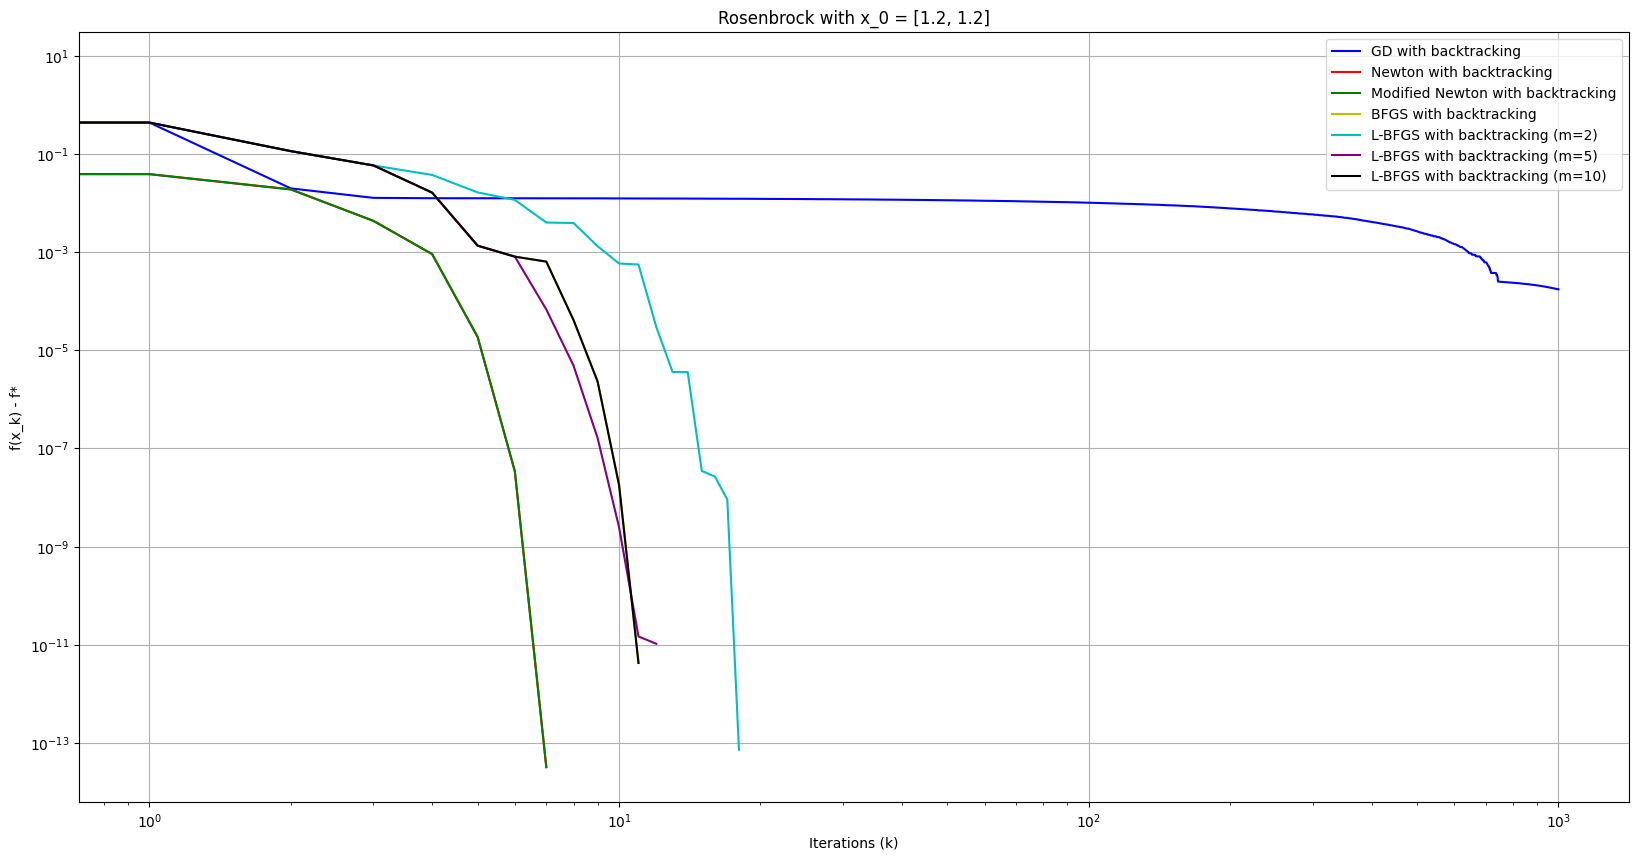

In [6]:
# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("ModifiedNewton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, beta=1e-6),
    Method("BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=2),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=5),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=10)
]

# Init problems
# Instantiate an object in the class as follows:
x0 = np.array([1.2, 1.2])
rosen_problem = Problem('Rosenbrock', x0=x0)

# Init options
options = Options(term_tol=1e-6, max_iterations=1e3)

# Array of correct values
f_star = 0

plot_convergence(rosen_problem, methods, options, f_star, title="Rosenbrock with x_0 = [1.2, 1.2]")

Number of skipped steps (GradientDescent): 0
Final value for GradientDescent is 0.0007484247354827242
Number of skipped steps (Newton): 0
Final value for Newton is 8.51707496768105e-12
Number of skipped steps (ModifiedNewton): 0
Final value for ModifiedNewton is 8.517075004986235e-12
Number of skipped steps (BFGS): 0
Final value for BFGS is 1.8660369912455125e-13
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 1.4112647454358433e-13
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 2.200163519887364e-11
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 6.002997808405983e-12


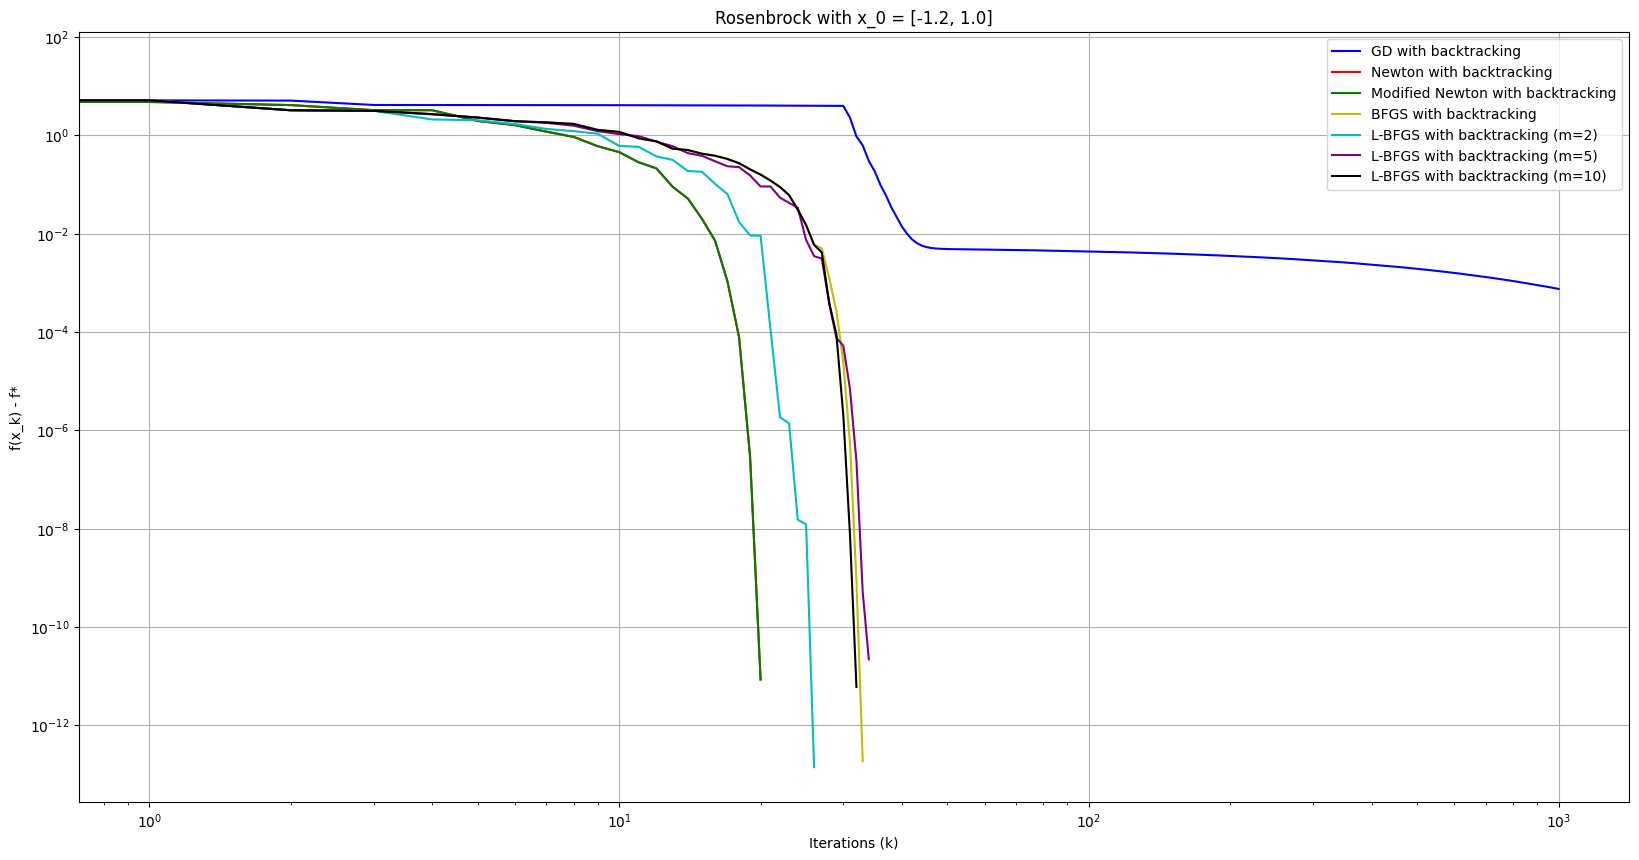

In [7]:
# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("ModifiedNewton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, beta=1e-6),
    Method("BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=2),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=5),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=10)
]

# Init problems
# Instantiate an object in the class as follows:
x0 = np.array([-1.2, 1.0])
rosen_problem = Problem('Rosenbrock', x0=x0)

# Init options
options = Options(term_tol=1e-6, max_iterations=1e3)

# Array of correct values
f_star = 0

plot_convergence(rosen_problem, methods, options, f_star, title="Rosenbrock with x_0 = [-1.2, 1.0]")

Number of skipped steps (GradientDescent): 0
Final value for GradientDescent is 1.0069463050789388e-09
Number of skipped steps (Newton): 0
Final value for Newton is 14.203125
Modified Newton: Cholesky factorization successful
Number of skipped steps (ModifiedNewton): 0
Final value for ModifiedNewton is 3.0634287285835483e-10
Number of skipped steps (BFGS): 0
Final value for BFGS is 3.802134375643066e-12
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 7.947364431801176e-12
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 3.3509819656265176e-11
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is 7.194303091754664e-15


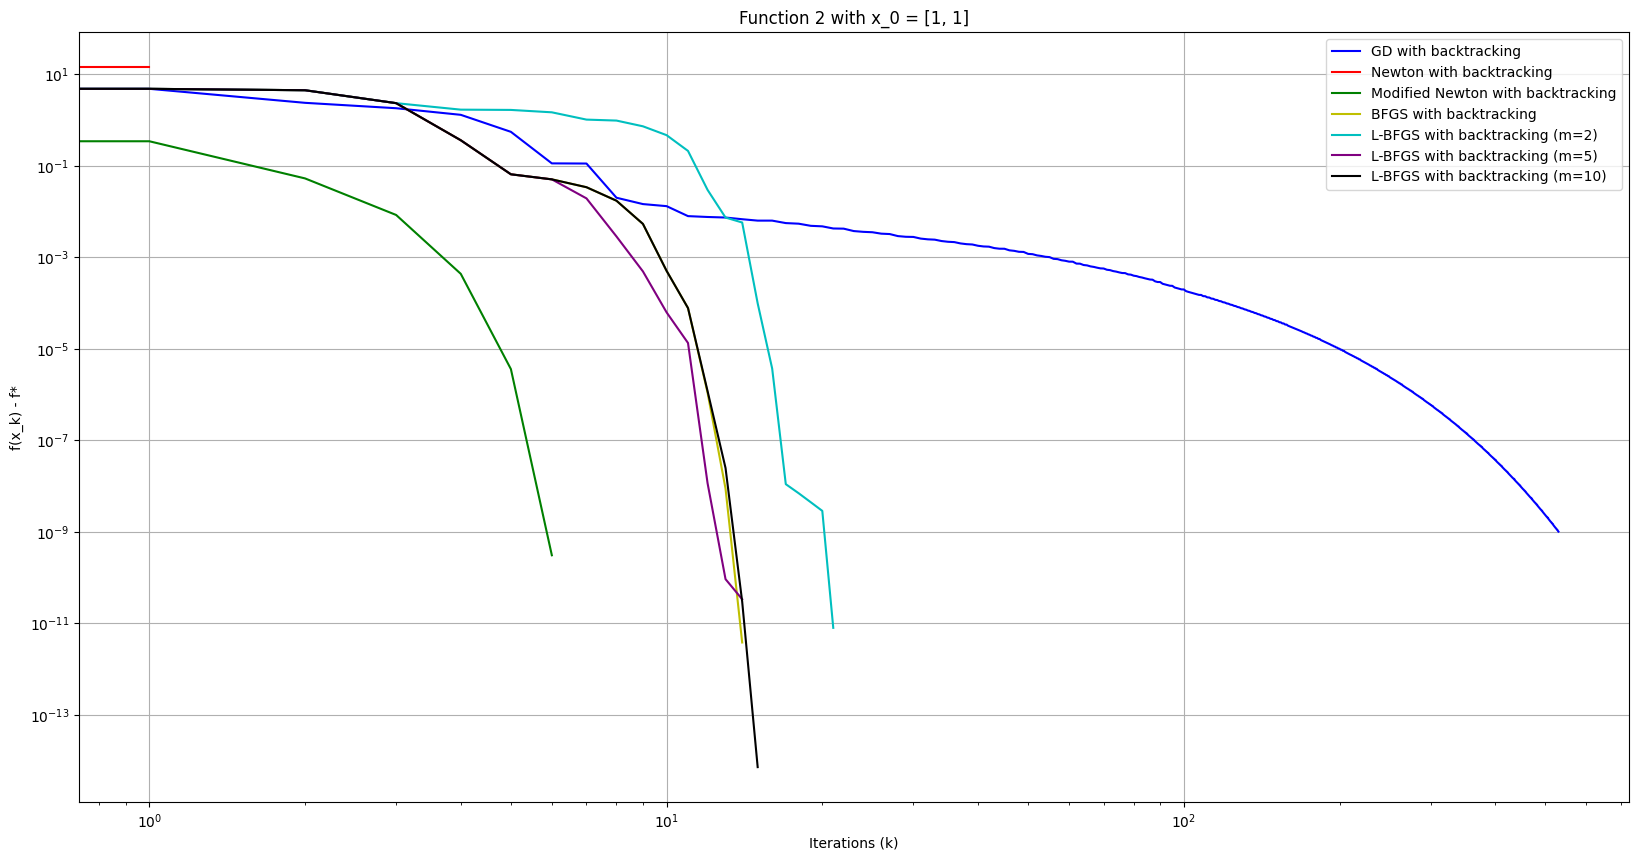

In [8]:
# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("ModifiedNewton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, beta=1e-6),
    Method("BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=2),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=5),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=10)
]

# Init problems
# Instantiate an object in the class as follows:
x0 = np.array([1.0, 1.0])
rosen_problem = Problem('Function 2', x0=x0)

# Init options
options = Options(term_tol=1e-6, max_iterations=1e3)

# Array of correct values
f_star = 0

plot_convergence(rosen_problem, methods, options, f_star, title="Function 2 with x_0 = [1, 1]")

Number of skipped steps (GradientDescent): 0
Final value for GradientDescent is -0.15835566836860338
Number of skipped steps (Newton): 0
Final value for Newton is 0.8792979508688299
Modified Newton: Cholesky factorization successful
Number of skipped steps (ModifiedNewton): 0
Final value for ModifiedNewton is -0.15847712921179577
Number of skipped steps (BFGS): 0
Final value for BFGS is -0.15852279504639216
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.1585090437731246
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.15851397341210754
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.15852279504639197


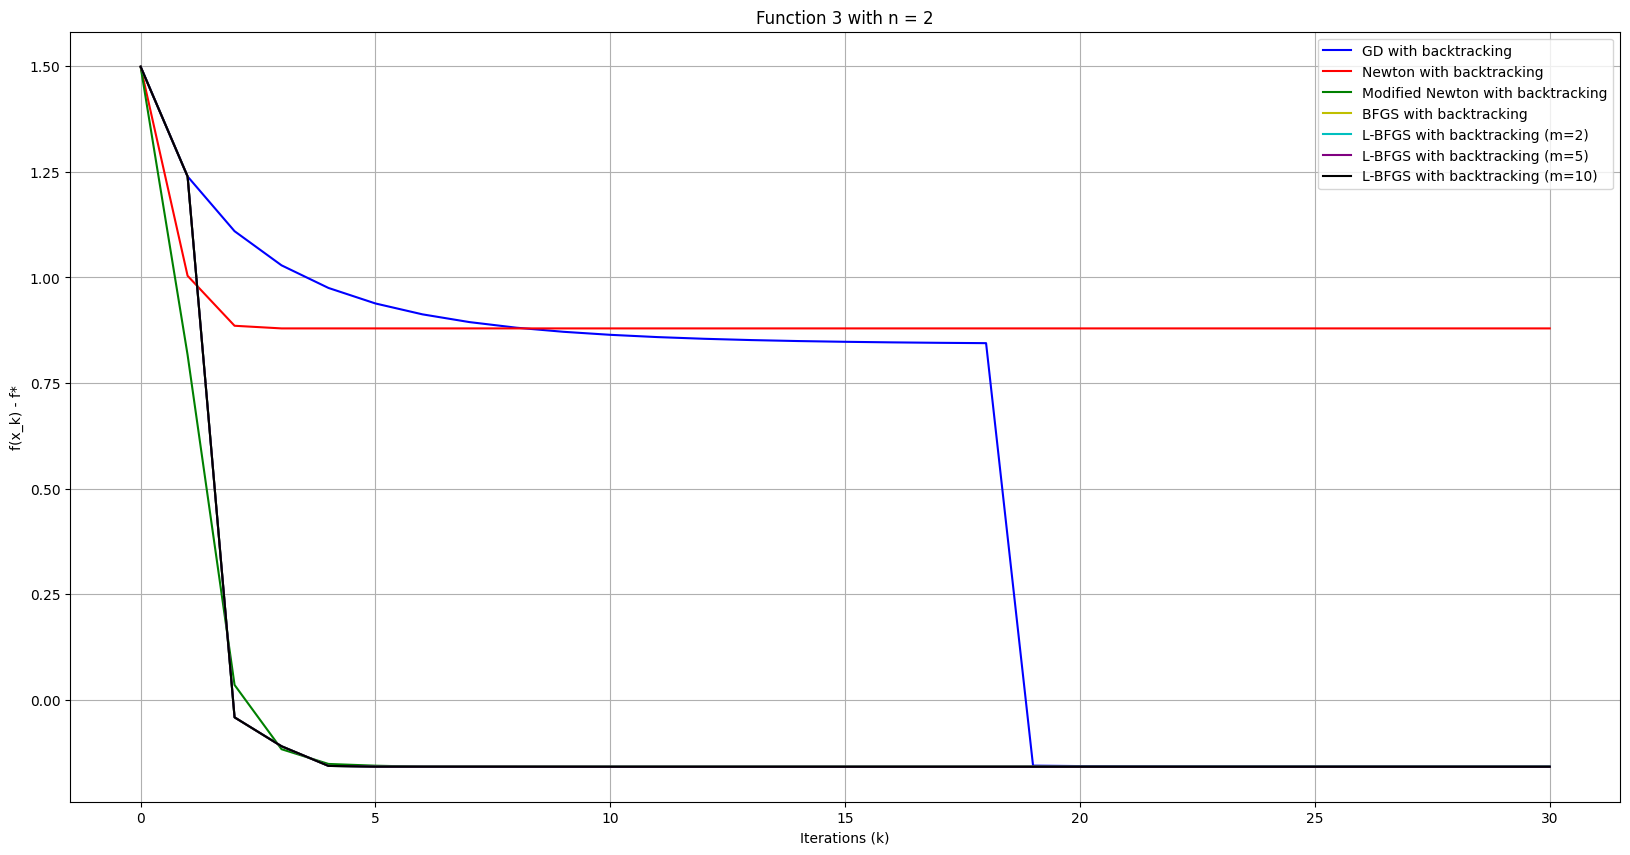

In [15]:
# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("ModifiedNewton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, beta=1e-6),
    Method("BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=2),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=5),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=10)
]

# Init problems
# Instantiate an object in the class as follows:
n = 2
x0 = np.zeros(n)
x0[0] = 1
problem = Problem('Function 3', x0=x0)

# Init options
options = Options(term_tol=1e-6, max_iterations=30)

# Array of correct values
f_star = 0

plot_convergence_linear(problem, methods, options, f_star, title=f"Function 3 with n = {n}")

Number of skipped steps (GradientDescent): 0
Final value for GradientDescent is -0.1583574299247851
Number of skipped steps (Newton): 0
Final value for Newton is 0.9023875752096723
Modified Newton: Cholesky factorization successful
Number of skipped steps (ModifiedNewton): 0
Final value for ModifiedNewton is -0.1583880882790029
Number of skipped steps (BFGS): 0
Final value for BFGS is -0.15835920451972843
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.15835920453112712
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.15835920451972837
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.15835920451972837


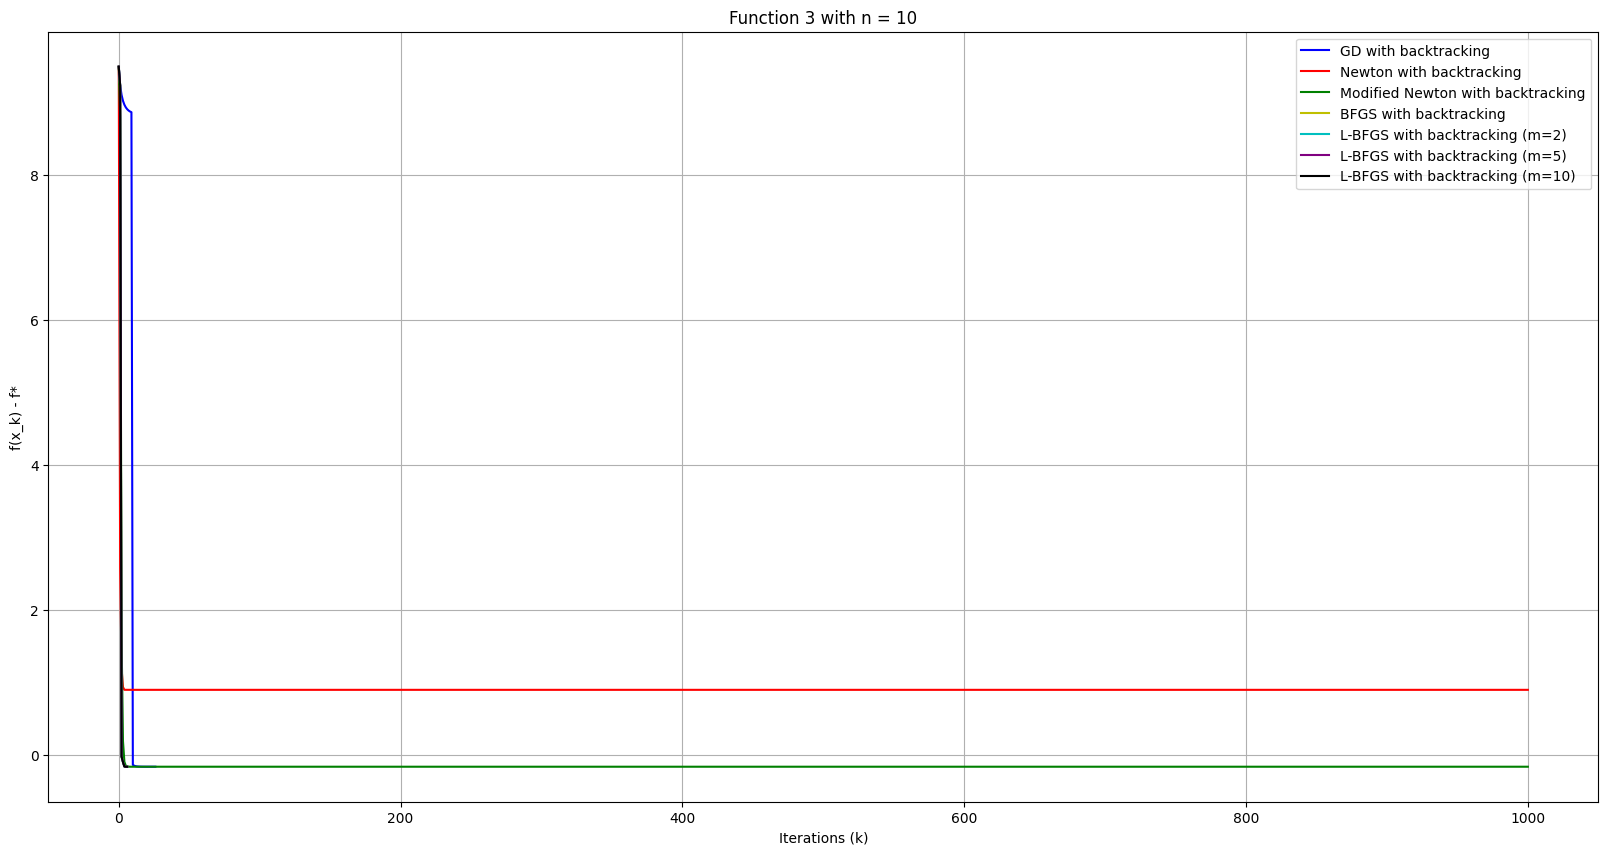

In [10]:
# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("ModifiedNewton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, beta=1e-6),
    Method("BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=2),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=5),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=10)
]

# Init problems
# Instantiate an object in the class as follows:
n = 10
x0 = np.zeros(n)
x0[0] = 1
problem = Problem('Function 3', x0=x0)

# Init options
options = Options(term_tol=1e-6, max_iterations=1e3)

# Array of correct values
f_star = 0

plot_convergence_linear(problem, methods, options, f_star, title=f"Function 3 with n = {n}")

Number of skipped steps (GradientDescent): 0
Final value for GradientDescent is -0.15835786481048134
Number of skipped steps (Newton): 0
Final value for Newton is 0.9181133648793534
Modified Newton: Cholesky factorization successful
Number of skipped steps (ModifiedNewton): 0
Final value for ModifiedNewton is -0.15835710133275757
Number of skipped steps (BFGS): 0
Final value for BFGS is -0.1583592118280023
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.15835921182800233
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.1583592118280023
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.1583592118280023


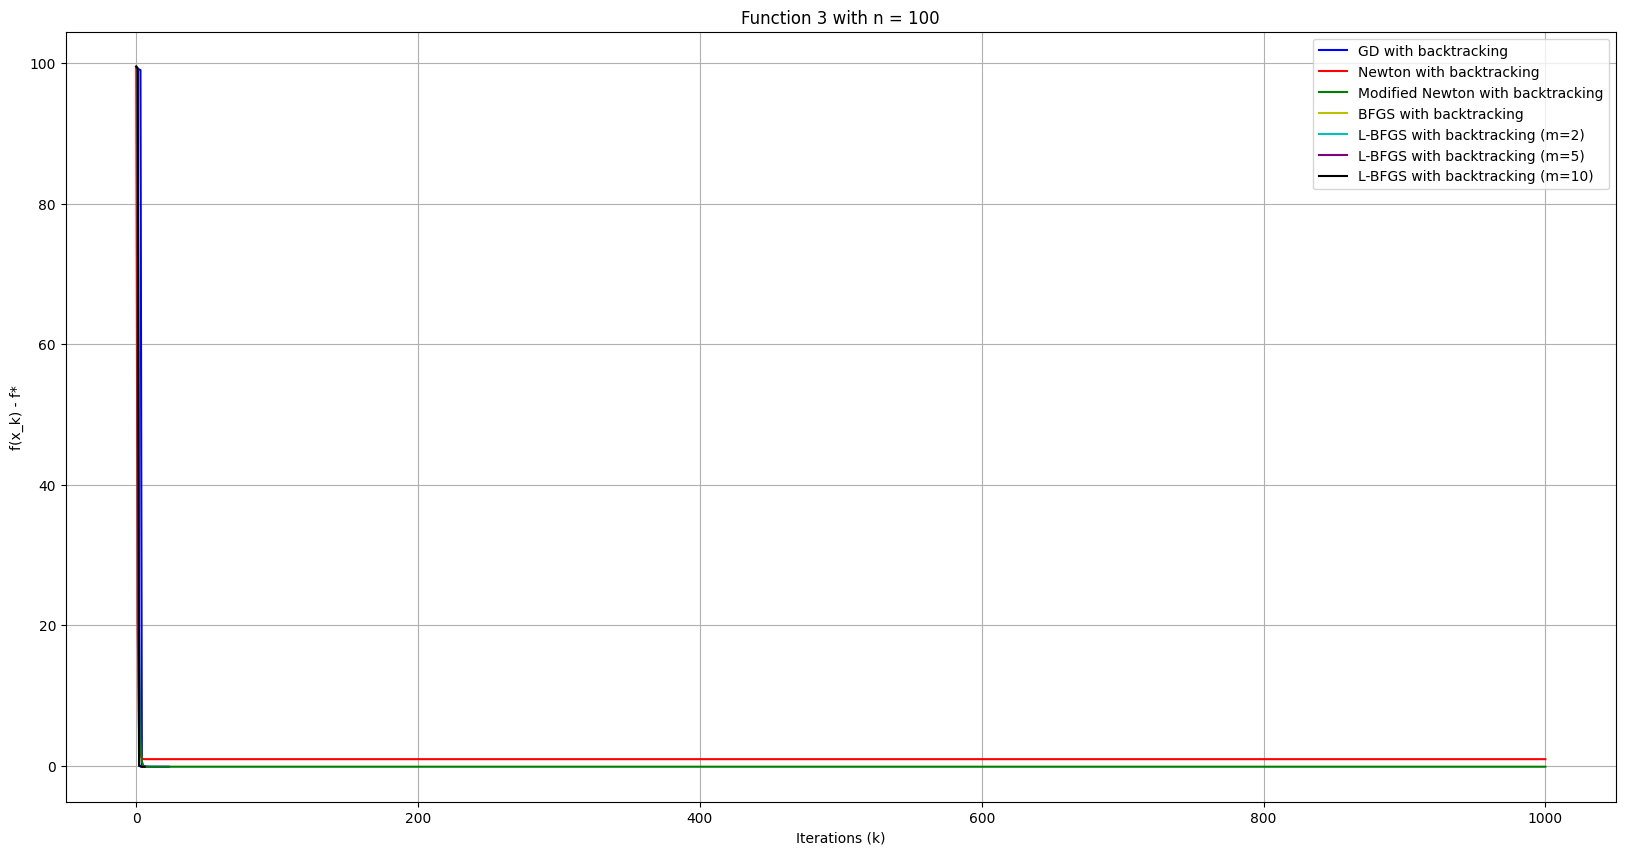

In [11]:
# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("ModifiedNewton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, beta=1e-6),
    Method("BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=2),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=5),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=10)
]

# Init problems
# Instantiate an object in the class as follows:
n = 100
x0 = np.zeros(n)
x0[0] = 1
problem = Problem('Function 3', x0=x0)

# Init options
options = Options(term_tol=1e-6, max_iterations=1e3)

# Array of correct values
f_star = 0

plot_convergence_linear(problem, methods, options, f_star, title=f"Function 3 with n = {n}")

Number of skipped steps (GradientDescent): 0
Final value for GradientDescent is -0.15835786134885163
Number of skipped steps (Newton): 0
Final value for Newton is 0.929377707392298
Modified Newton: Cholesky factorization successful
Number of skipped steps (ModifiedNewton): 0
Final value for ModifiedNewton is -0.158355559256828
Number of skipped steps (BFGS): 0
Final value for BFGS is -0.1583592130968215
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.1583592130968215
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.1583592130968215
Number of skipped steps (L-BFGS): 0
Final value for L-BFGS is -0.1583592130968215


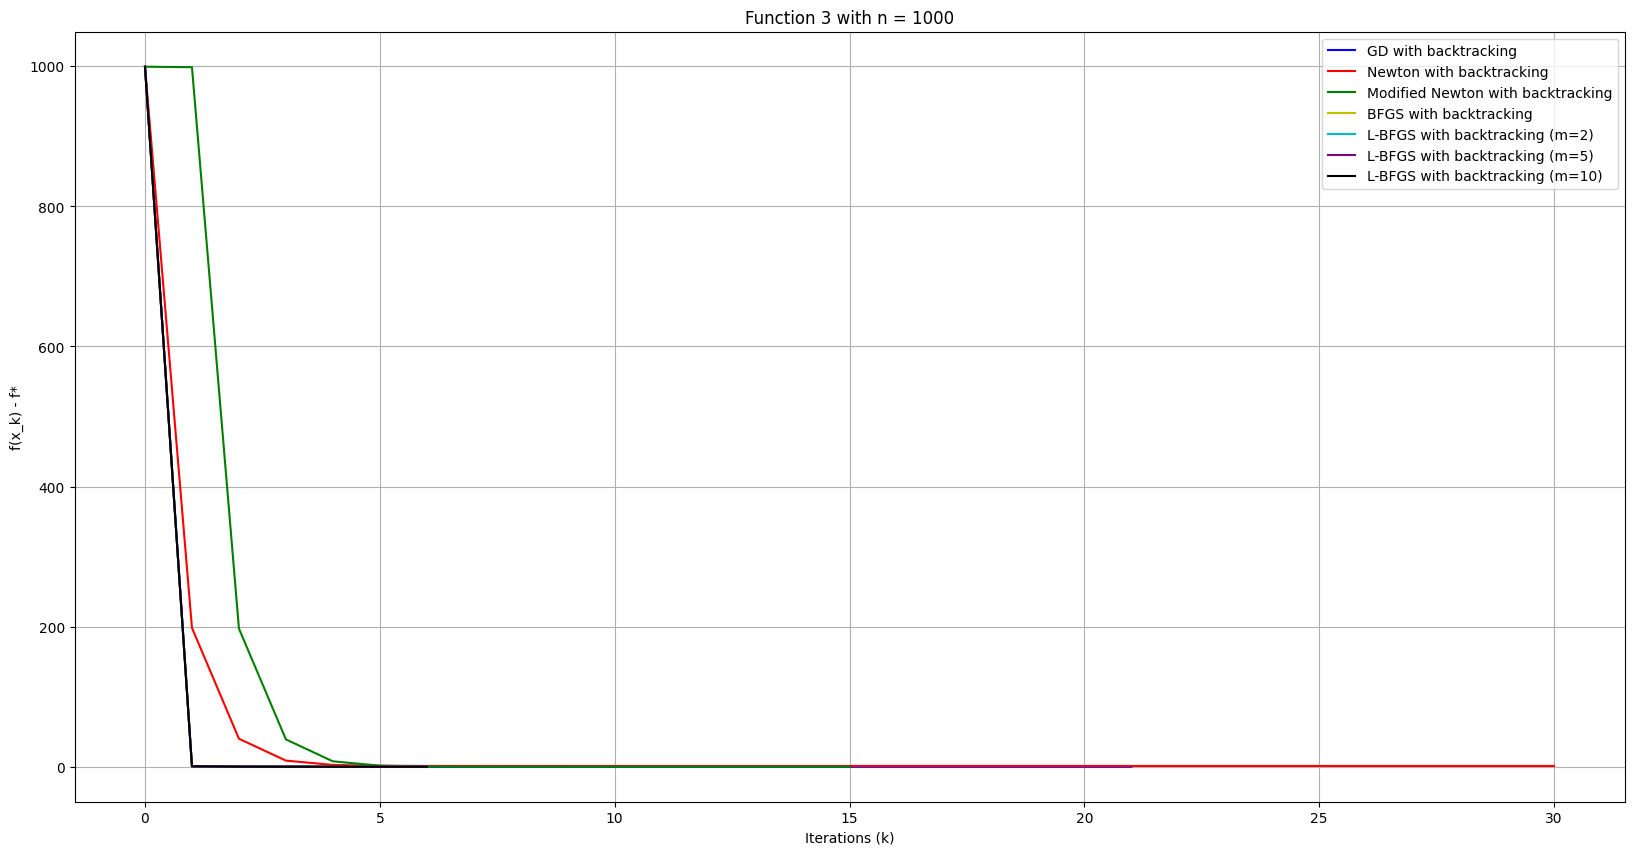

In [16]:
# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("ModifiedNewton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, beta=1e-6),
    Method("BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=2),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=5),
    Method("L-BFGS", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4, epsilon_sy=1e-6, memory_size=10)
]

# Init problems
# Instantiate an object in the class as follows:
n = 1000
x0 = np.zeros(n)
x0[0] = 1
problem = Problem('Function 3', x0=x0)

# Init options
options = Options(term_tol=1e-6, max_iterations=30)

# Array of correct values
f_star = 0

plot_convergence_linear(problem, methods, options, f_star, title=f"Function 3 with n = {n}")

In [13]:
# Newton takes forever